## 說明 

此為TAVI領域之資料

因為SQL語法過長，導致jupyter notebook開啟不順，會當機，故將語法大量刪除，有將跑好的資料存起來，從讀檔開始跑即可

此處有考慮時間段、醫療辭典

In [1]:
#要存model的話 save_model = 1 ; 不存的話 save_model = 0
save_model = 0

## 將SQL資料庫用python查詢

只需將sql語法輸入query = """ 語法 """

因為要跑很久，已經有儲存資料，從下方開始跑!!!

In [2]:
import pandas as pd
import pymssql 
import pickle
'''
conn = pymssql.connect(server="140.112.180.100", user="sa", password="Pris9630", database='Patent')  
cursor = conn.cursor()
#共2362筆專利
query = """ """
cursor.execute(query)
row = cursor.fetchone()
'''

'\nconn = pymssql.connect(server="140.112.180.100", user="sa", password="Pris9630", database=\'Patent\')  \ncursor = conn.cursor()\n#共2362筆專利\nquery = """ """\ncursor.execute(query)\nrow = cursor.fetchone()\n'

In [8]:
'''
c = 0
df_original = pd.DataFrame(columns = ['PN', 'CONTENT','PUBD'])
while row:  
    df_original = df_original.append({'PN':str(row[0]), 'CONTENT':str(row[3]), 'PUBD':row[1]}, ignore_index = True)
    #print(str(row[0]) + str(row[1]) + str(row[2]))     
    if c %1000 == 0:
        print(df_original)
    c = c+1
    row = cursor.fetchone() 
'''

         PN                                            CONTENT        PUBD
0  07166570  Briefly stated, the present invention provides...  2007-01-23
            PN                                            CONTENT        PUBD
0     07166570  Briefly stated, the present invention provides...  2007-01-23
1     07166570  The repair of tissues following a mechanical o...  2007-01-23
2     07166570  Within one embodiment of the invention, an imp...  2007-01-23
3     07166570  Thus, in various independent aspects, the pres...  2007-01-23
4     07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...        ...                                                ...         ...
996   08348995  In an embodiment, the prosthesis is configured...  2013-01-08
997   08348995  In an embodiment, the prosthesis is configured...  2013-01-08
998   08348995  In an embodiment, the distal fixation member i...  2013-01-08
999   08348995  In an embodiment, the distal fixation member i...  201

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
9996   09056006  In some implementations, the fibers include on...  2015-06-16
9997   09056006  In another aspect, a prosthetic heart valve in...  2015-06-16
9998   09056006  In some implementations, the base defines a su...  2015-06-16
9999   09056006  In certain implementations, the fibers are sub...  2015-06-16
10000  09056006  In some implementations, the fibers are arrang...  2015-06-16

[10001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
18996  09895221  In another embodiment, there is provided a fea...  2018-02-20
18997  09895221  In another embodiment, there is provided a ret...  2018-02-20
18998  09895221  Articulating Collar Support Structures with Co...  2018-02-20
18999  09895221  In another preferred embodiment, there is prov...  2018-02-20
19000  09895221  In a preferred embodiment, the flared end or c...  2018-02-20

[19001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
27996  08876894  There is still further provided, in accordance...  2014-11-04
27997  08876894  providing the prosthesis including a valve pro...  2014-11-04
27998  08876894  implanting the prosthesis such that each of th...  2014-11-04
27999  08876894  In an embodiment, implanting includes implanti...  2014-11-04
28000  08876894  There is yet further provided, in accordance w...  2014-11-04

[28001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
36996  10154900  Furthermore, in accordance with another prefer...  2018-12-18
36997  10154900  Furthermore, in accordance with another prefer...  2018-12-18
36998  10154900  Furthermore, in accordance with another prefer...  2018-12-18
36999  10154900  Furthermore, in accordance with another prefer...  2018-12-18
37000  10154900  Furthermore, in accordance with another prefer...  2018-12-18

[37001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
45996  10398421  According to a fifth aspect of the invention, ...  2019-09-03
45997  10398421  forming an opening in the patient's atrial sep...  2019-09-03
45998  10398421  inserting at least one one way valve in the op...  2019-09-03
45999  10398421  securing the one way valve(s) relative to the ...  2019-09-03
46000  10398421  whereby, when the patient's left atrial pressu...  2019-09-03

[46001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
54996  10568738  In an application, at least one of the couplin...  2020-02-25
54997  10548731  Moreover, the development also provides an art...  2020-02-04
54998  10548731  Also described are distal anchoring features. ...  2020-02-04
54999  10548731  Thus, some embodiments of the anchor assembly ...  2020-02-04
55000  10548731  In one aspect, an implant for reshaping a mitr...  2020-02-04

[55001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
63996  10952842  According to another example (Example 12), fur...  2021-03-23
63997  10952842  According to another example (Example 13), fur...  2021-03-23
63998  10952842  According to another example (Example 14), fur...  2021-03-23
63999  10952842  According to another example (Example 15), fur...  2021-03-23
64000  11007059  The disclosure further provides an implant tha...  2021-05-18

[64001 rows x 3 columns]
             PN           

             PN                                            CONTENT        PUBD
0      07166570  Briefly stated, the present invention provides...  2007-01-23
1      07166570  The repair of tissues following a mechanical o...  2007-01-23
2      07166570  Within one embodiment of the invention, an imp...  2007-01-23
3      07166570  Thus, in various independent aspects, the pres...  2007-01-23
4      07166570  In each of the aforementioned devices, in sepa...  2007-01-23
...         ...                                                ...         ...
72996  10456255  The present invention comprises a novel and sa...  2019-10-29
72997  10456255  Furthermore, the valve apparatus comprises a d...  2019-10-29
72998  10456255  The features of the present invention which ar...  2019-10-29
72999  10463487  The present disclosure will be more fully unde...  2019-11-05
73000  10384043  For some applications, the struts are arranged...  2019-08-20

[73001 rows x 3 columns]
             PN           

In [9]:
#df_original

,PN,CONTENT,PUBD
0,07166570,"Briefly stated, the present invention provides...",2007-01-23
1,07166570,The repair of tissues following a mechanical o...,2007-01-23
2,07166570,"Within one embodiment of the invention, an imp...",2007-01-23
3,07166570,"Thus, in various independent aspects, the pres...",2007-01-23
4,07166570,"In each of the aforementioned devices, in sepa...",2007-01-23
...,...,...,...
75777,10898327,A further understanding of the nature and adva...,2021-01-26
75778,08790367,Described herein are devices and methods that ...,2014-07-29
75779,08790367,"In some embodiments, a system for use in a pat...",2014-07-29
75780,08790367,"In other embodiments, an implant delivery syst...",2014-07-29


## 存df_original  才不用重跑

In [10]:
#with open('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/var_save/df_original_TAVI.pickle', 'wb') as handle:
#    pickle.dump(df_original, handle, protocol=pickle.HIGHEST_PROTOCOL)

# -----從這開始跑-----

In [3]:
with open('var_save/df_original_TAVI.pickle', 'rb') as handle:
    df_original= pickle.load(handle)

In [4]:
df_original

,PN,CONTENT,PUBD
0,07166570,"Briefly stated, the present invention provides...",2007-01-23
1,07166570,The repair of tissues following a mechanical o...,2007-01-23
2,07166570,"Within one embodiment of the invention, an imp...",2007-01-23
3,07166570,"Thus, in various independent aspects, the pres...",2007-01-23
4,07166570,"In each of the aforementioned devices, in sepa...",2007-01-23
...,...,...,...
75777,10898327,A further understanding of the nature and adva...,2021-01-26
75778,08790367,Described herein are devices and methods that ...,2014-07-29
75779,08790367,"In some embodiments, a system for use in a pat...",2014-07-29
75780,08790367,"In other embodiments, an implant delivery syst...",2014-07-29


In [5]:
#print(len(df_original.PN.unique())) #2362 -> 2264
#df_original.PN.unique()

2264


array(['07166570', '07175656', '07195640', ..., '10898326', '10898327',
       '08790367'], dtype=object)

## ---這段也可以不用跑，有存df_summary---

In [6]:
#df_original

,PN,CONTENT,PUBD
0,07166570,"Briefly stated, the present invention provides...",2007-01-23
1,07166570,The repair of tissues following a mechanical o...,2007-01-23
2,07166570,"Within one embodiment of the invention, an imp...",2007-01-23
3,07166570,"Thus, in various independent aspects, the pres...",2007-01-23
4,07166570,"In each of the aforementioned devices, in sepa...",2007-01-23
...,...,...,...
75777,10898327,A further understanding of the nature and adva...,2021-01-26
75778,08790367,Described herein are devices and methods that ...,2014-07-29
75779,08790367,"In some embodiments, a system for use in a pat...",2014-07-29
75780,08790367,"In other embodiments, an implant delivery syst...",2014-07-29


In [7]:
#print(type(df_original['PUBD'][0]))

<class 'datetime.date'>


In [ ]:
'''
df_summary = pd.DataFrame(columns = ['PN', 'CONTENT', 'YEAR'])
for pn in df_original['PN'].unique():
    content = ''
    for i in range(len(df_original)):
        if df_original['PN'][i] == pn:
            year = df_original['PUBD'][i]
            content += df_original['CONTENT'][i]
    #print(pn,year, '\n' ,content)
    df_summary = df_summary.append({'PN':pn, 'CONTENT':content,'YEAR':year}, ignore_index = True)
    # df_original = df_original.append({'PN':str(row[1]), 'CONTENT':str(row[4]), 'DATE':row[7]}, ignore_index = True)
'''

In [ ]:
#df_summary

In [ ]:
'''
import pickle
with open('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/var_save/df_summary_TAVI.pickle', 'wb') as handle:
    pickle.dump(df_summary, handle, protocol=pickle.HIGHEST_PROTOCOL)
'''

## -----------------------從這開始繼續!---------------------------

In [5]:
with open('var_save/df_summary_TAVI.pickle', 'rb') as handle:
    df_summary = pickle.load(handle)

In [6]:
df_summary

,PN,CONTENT,YEAR
0,07166570,"Briefly stated, the present invention provides...",2007-01-23
1,07175656,The present invention provides improved device...,2007-02-13
2,07195640,The medical devices in combination with therap...,2007-03-27
3,07241295,It is an object of the invention to provide a ...,2007-07-10
4,07261732,"Accordingly, an object of the present inventio...",2007-08-28
...,...,...,...
2259,10849745,Embodiments hereof relate to a balloon cathete...,2020-12-01
2260,08038710,The present invention provides artificial valv...,2011-10-18
2261,10729542,"As discussed above, stented prosthetic heart v...",2020-08-04
2262,09801721,"In some embodiments, a sizing device for use i...",2017-10-31


## 新增手動查詢的summary

如果沒有人工查詢其他summary資料，add_summary = 0

如果有人工查詢其他summary資料， add_summary = 1

In [7]:
#有手動新增資料 == 1 ;沒有 == 0
add_summary = 0

In [8]:
if add_summary == 1:
    df_loss = pd.read_excel('DESCRIPTION_SUMMARY_0521.xlsx','工作表1')  #增加手動新增的summary，注意格式要PN / summary / PUBD
    documents_merge = df_summary.append(df_loss,ignore_index = True)
else:
    documents_merge = df_summary

documents_merge['YEAR'] = pd.to_datetime(documents_merge['YEAR']).dt.date #不顯示時間

In [9]:
documents_merge

,PN,CONTENT,YEAR
0,07166570,"Briefly stated, the present invention provides...",2007-01-23
1,07175656,The present invention provides improved device...,2007-02-13
2,07195640,The medical devices in combination with therap...,2007-03-27
3,07241295,It is an object of the invention to provide a ...,2007-07-10
4,07261732,"Accordingly, an object of the present inventio...",2007-08-28
...,...,...,...
2259,10849745,Embodiments hereof relate to a balloon cathete...,2020-12-01
2260,08038710,The present invention provides artificial valv...,2011-10-18
2261,10729542,"As discussed above, stented prosthetic heart v...",2020-08-04
2262,09801721,"In some embodiments, a sizing device for use i...",2017-10-31


## 3 period

將patent分成三個區間

In [10]:
from datetime import date

In [11]:
df_1 = pd.DataFrame(columns = ['PN','summary','date'])
df_2 = pd.DataFrame(columns = ['PN','summary','date'])
df_3 = pd.DataFrame(columns = ['PN','summary','date'])

for i in range(len(documents_merge.YEAR)):
    if documents_merge.iloc[i][2] <= date(2011, 12, 31):
        PN = documents_merge.iloc[i][0]
        summary = documents_merge.iloc[i][1]
        year = documents_merge.iloc[i][2]
        df_1 = df_1.append({'PN':documents_merge.iloc[i][0],'summary':documents_merge.iloc[i][1],'date':documents_merge.iloc[i][2]},ignore_index = True)
    if documents_merge.iloc[i][2] <= date(2016, 12, 31) and documents_merge.iloc[i][2] >= date(2011,1,1):
        df_2 = df_2.append({'PN':documents_merge.iloc[i][0],'summary':documents_merge.iloc[i][1],'date':documents_merge.iloc[i][2]},ignore_index = True)
    if documents_merge.iloc[i][2] <= date(2021, 12, 31) and documents_merge.iloc[i][2] >= date(2016,1,1):
        df_3 = df_3.append({'PN':documents_merge.iloc[i][0],'summary':documents_merge.iloc[i][1],'date':documents_merge.iloc[i][2]},ignore_index = True)

In [12]:
year_11 = 0
year_16 = 0
for i in range(len(documents_merge.YEAR)):
    if documents_merge.iloc[i][2] <= date(2011, 12, 31) and documents_merge.iloc[i][2] >= date(2011,1,1):
        year_11 += 1
    elif documents_merge.iloc[i][2] <= date(2016, 12, 31) and documents_merge.iloc[i][2] >= date(2016,1,1):
        year_16 += 1
print('2011:', year_11, '2016:', year_16)

2011: 41 2016: 209


In [13]:
df_1

,PN,summary,date
0,07166570,"Briefly stated, the present invention provides...",2007-01-23
1,07175656,The present invention provides improved device...,2007-02-13
2,07195640,The medical devices in combination with therap...,2007-03-27
3,07241295,It is an object of the invention to provide a ...,2007-07-10
4,07261732,"Accordingly, an object of the present inventio...",2007-08-28
...,...,...,...
119,07074189,The present invention teaches certain benefits...,2006-07-11
120,07195774,"In an embodiment, an implantable and sealable ...",2007-03-27
121,07682304,The present invention provides a methodology f...,2010-03-23
122,08052749,One aspect of the invention provides an appara...,2011-11-08


In [14]:
df_2

,PN,summary,date
0,07867729,"The present invention is based, at least in pa...",2011-01-11
1,07875284,The present disclosure relates to methods of m...,2011-01-25
2,08348995,"In some embodiments of the present invention, ...",2013-01-08
3,08348996,"In some embodiments of the present invention, ...",2013-01-08
4,08348998,Various embodiments of the present application...,2013-01-08
...,...,...,...
646,09452047,The present invention provides a heart valve p...,2016-09-27
647,09308346,"In some embodiments, a device for crimping a c...",2016-04-12
648,09295547,One or more embodiments hereof are directed to...,2016-03-29
649,09066800,Embodiments hereof are directed to a dual valv...,2015-06-30


In [15]:
df_3

,PN,summary,date
0,09532870,"In one representative embodiment, a prosthetic...",2017-01-03
1,09532873,The invention provided comprises embodiments f...,2017-01-03
2,09539088,"As a result, one object of the present inventi...",2017-01-10
3,09539091,"In accordance with a preferred embodiment, the...",2017-01-10
4,09539094,A simulated environment for transcatheter repa...,2017-01-10
...,...,...,...
1734,10610354,Apparatus and methods for anchoring a prosthet...,2020-04-07
1735,10849745,Embodiments hereof relate to a balloon cathete...,2020-12-01
1736,10729542,"As discussed above, stented prosthetic heart v...",2020-08-04
1737,09801721,"In some embodiments, a sizing device for use i...",2017-10-31


## MedTerm

之後可能會考慮用UMLS

In [16]:
f = open('MedTerm.txt')
text = []
MedTerm = []
for line in f:
    text.append(line)
for i in text:
    MedTerm.append(i.split('\n', 1)[0].lower())

In [17]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
#nltk.download('wordnet')

C:\Users\Annie\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [18]:
min_len = 1

In [19]:
def lemmatize_stemming(text):
    # 把字詞幹化
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess_term(text):
    term_lemma = []
    term_tmp = []
    result = [] 
    #print(text)
    
    for token in gensim.utils.simple_preprocess(text, min_len=min_len, max_len=35):  #tokenize
        #print(token)
        term_tmp.append((lemmatize_stemming(token)))
    term_lemma.append(' '.join(term_tmp))
    return term_lemma

In [20]:
MedTerm_lemma = []  #儲存詞幹化之後的MedTerms
for w in MedTerm:
    #print(preprocess(w))
    MedTerm_lemma.append(preprocess_term(w))

In [21]:
MedTerm_lemma_fin = []   #將MedTerms弄成跟原本的MedTerms一樣格式
for i in range(len(MedTerm_lemma)):
    for j in range(len(MedTerm_lemma[i])):
        MedTerm_lemma_fin.append(MedTerm_lemma[i][0])

In [22]:
 # import MWETokenizer() method from nltk 
from nltk.tokenize import MWETokenizer 
   
# Create a reference variable for Class MWETokenizer  

MedTerm_mwe = []  #將兩個以上單字組成的字詞用tuple刮在一起
#tmp = ()
for i in range(len(MedTerm_lemma_fin)):
    if len(MedTerm_lemma_fin[i].split(' '))> 1:
        tmp = ()
        tmp = tmp + tuple(MedTerm_lemma_fin[i].split(' '))
        MedTerm_mwe.append(tmp)
    else:
        MedTerm_mwe.append(MedTerm_lemma_fin[i])

In [24]:
#兩個以上的字用_連接
tk = MWETokenizer(MedTerm_mwe) 
MedTerm_token = []
MedTerm_token_show = []  #將長度=0的也留著(為了方便表格觀看)
for i in range(len(MedTerm_lemma_fin)):
    if len(MedTerm_lemma_fin[i]) != 0:
        MedTerm_token.append(tk.tokenize(MedTerm_lemma_fin[i].split())[0])
        MedTerm_token_show.append(tk.tokenize(MedTerm_lemma_fin[i].split())[0])       
    else:
        MedTerm_token_show.append('')
    #print(token_medterm[0])

In [25]:
for token in MedTerm_token:
    print(token)

a_adenin
a
a_t
a_c
aaa
aaa
aad
aafp_american_academi_of_famili_physician
aamc_ass_be_medic_colleg
aanat
aao
aao_american_academi_of_orthopaed_surgeon
aap
aarskog_syndrom
aarskog_scott_syndrom
aas_smith_syndrom_i
aas_smith_syndrom_ii
ab_ovo
ab
abat
abat
abdomen
abdomen_acut
abdomin
abdomin_aneurysm
abdomin_aorta
abdomin_aortic_aneurysm
abdomin_caviti
abdomin_guard
abdomin_hysterectomi
abdomin_muscl_defici_syndrom
abdomin_muscl
abdomin_pain
abduc_nerv
abduct
abductor_muscl
aberr
aberrometri_and_wavefront_imag
abg_arteri_blood_gas
abiolog
abiot
abiotrophi
ablat
ablat
ablat_endometri
ablepharon_macrostomia
abnorm
abo_blood_group
abortifaci
abort
abort_artifici
abort_habitu
abort_induc
abort_multipl
abort_recurr
abort_spontan
abort_therapeut
abort
abort_polio
abr_test
abrad
abraham_man
abras
abrin
abruptio_abruptio_placenta
abrupt
ab
abscess
abscess_breast
abscess_perian
abscess_peritonsillar
abscess_skin
absciss
abs
abs_danni
absenc_of_the_breast
absenc_of_the_nippl
absenc_seizur
absent_ey

brontophobia
brook_spiegler_syndrom
bross
bross_irwin_dj
brown_fat
brown_syndrom
brown_louis
brown_michael_stuart
bruce_n_ame
bruce_protocol
brucellosi
brugada_syndrom
bruis
bruit
brunhild_virus
brushfield_s_spot
bruton_agammaglobulinemia_tyrosin_kinas
bruxism
bsa
bsl
bsl
bsl
bsl
bsl
bubbl_boy_diseas
bubo
bubo
bubon_plagu
buccal_mucosa
buerger_s_diseas
buffalo_chest
buffalo_hump
bug_kiss
bug_reduviid
bulbar
bulbar_conjunctiva
bulbourethr_gland
bulimia
bulimia_nervosa
bulimia_suscept_gene
bulla
bulla
bullous
bullous_pemphigoid
bulli
bump
bun
bundl
bunion
buprenorphin
burkholderia_cepacia
burkitt_lymphoma
burkitt_s_lymphoma
burn
burn_treatment
burn_first_degre
burn_second_degre
burn_third_degre
burn_mouth_syndrom
burn_urin
burp
bursa
bursa
bursal
bursiti
bursiti_asept
bursiti_calcif
bursiti_elbow
bursiti_hip
bursiti_knee
bursiti_septic
bursiti_shoulder
bursopathi
buruli_ulcer
burundanga_hyoscin_hydrobromid
buschk_diseas
buschk_scleredema
buschk_s_diseas
buschk_s_scleredema
butterbur
butt

diseas_bowen_s
diseas_bright_s
diseas_brill_zinsser
diseas_canavan
diseas_cardiovascular
diseas_castleman
diseas_cat_scratch
diseas_chaga
diseas_charcot_mari_tooth
diseas_chronic_obstruct_lung_cold
diseas_chronic_obstruct_pulmonari_copd
diseas_chronic_wast
diseas_clinic
diseas_congenit_heart
diseas_conor_and_bruch
diseas_coronari_arteri
diseas_creutzfeldt_jakob_cjd
diseas_crohn
diseas_cush
diseas_cystin_transport
diseas_degen_joint
diseas_delta_storag_pool
diseas_exagger_startl
diseas_fabri
diseas_fahr
diseas_fifth
diseas_fong
diseas_foot_and_mouth
diseas_foresti
diseas_gaucher_type
diseas_gerstmann_straussler_scheinker
diseas_gilbert
diseas_graft_versus_host
diseas_grave
diseas_guinea_worm
diseas_gum
diseas_hand_foot_and_mouth
diseas_hansen
diseas_heberden
diseas_hemolyt_of_the_newborn
diseas_hirschsprung
diseas_his
diseas_his_werner
diseas_hodgkin_adult
diseas_hodgkin_hodgkin_lymphoma
diseas_huntington
diseas_hyalin_membran
diseas_hydroxyapatit_crystal
diseas_inflammatori_bowel
disea

genom_saccharomyc_cerevisia
genom_vibrio_cholera
genom_yeast
genom_yersinia_pesti
genom
genom_imprint
genom_librari
genom_segment
genom
genom_structur
genoplasti
genotoxin
genotyp
genu
geographi_medic
georg_w_thorn
gephyrophobia
gerascophobia
gerd
gerd_surgeri_fundopl
geriatr_medicin
geriatr
germ
germ_cell
germ_cell_tumor
germ_line
german_diseas
german_measl_immun
german_measl_vaccin
germanium
germinoma
germlin_mutat
germophob_germaphob
gerontolog
gerstmann_straussler_diseas
gerstmann_straussler_syndrom
gerstmann_straussler_scheinker_diseas
gerstmann_straussler_scheinker_syndrom
gerti_f_marx
gesel_development_schedul
gestalt_therapi
gestat
gestat_period
gestat_carrier
gestat_diabet
gestat_hypertens
gesundheit
gfap
gfp
ghb
gi
gi_tract
giant_cell_arter
giant_cell_pneumonia
giant_cell_tumor_of_bone
giant_cell_tumor_malign
giant_hypertroph_gastriti
giant_hypertrophi_of_gastric_mucosa
giant_intestin_fluke
giant_platelet_syndrom
giardia
giardia_lamblia
giardiasi
gibbon
gibbon_heart_lung_mach

jps
jugular
jugular_vein
jugular_vein_extern
jugular_vein_intern
julius_axelrod
jumper_s_knee
junction_epidermolysi_bullosa
junctur
june_cold
junk_dna
jurisprud_medic
juvenil
juvenil_chronic_arthriti_system_onset
juvenil_chronic_myelogen_leukemia
juvenil_cml
juvenil_diabet
juvenil_hyalin_fibromatosi
juvenil_intestin_polyposi
juvenil_laryng_papillomatosi
juvenil_melanoma
juvenil_myelomonocyt_leukemia
juvenil_polyposi
juvenil_polyposi_coli
juvenil_polyposi_of_stomach
juvenil_polyposi_syndrom
juvenil_retinoschisi
juvenil_rheumatoid_arthriti
juvenil_onset_diabet
juxta
juxtaarticular
juxtaglomerular_apparatus
juxtaposit
juxtapylor
juxtaspin
juxtavesicular
k_potassium
k_kinga
kabuki_syndrom
kala_azar
kalemia
kallmann_syndrom
kaposi_sarcoma
kartagen_syndrom
karyocyt
karyokinesi
karyotyp
karyotyp_spectral_sky
karyotyp
karyotyp_flow
kashin_beck_diseas
kashin_bek_diseas
kawasaki_diseas
kb
kearn_sayr_syndrom
kegel_exercis
kelman_charl_d
keloid
keratectomi
keratectomi_photorefract_prk
keratin
kera

ncrr
ncs
ncv
nd
neanderth
nearsighted
nebul_heat
nebul
neck
neck_dissect
neck_pain
neck_chronic_stiff
neck_wri
necrobiosi
necrobiosi_lipoidica
necrobiosi_lipoidica_diabeticorum
necropsi
necrosi
necrosi_coagul
necrot
necrot_fasciiti
necrot_gingiv
necrot_pneumonia
needl_biopsi_stereotact
needl_stick
needlestick_injuri
nef_gene
negat_calori_diet
negat_clinic_trial
negat_fals
negat_strand_rna_virus
neglect_child
nei
neisseria
neisseria_infect
nejm
nematod
neo_prefix
neocortex
neonat
neonat_chloramphenicol_toxic
neonat_hyperbilirubinemia
neonat_intens_care_unit
neonat_jaundic
neonat_lupus
neonat_mortal_rate
neonat_sepsi
neonat
neonatologist
neonatolog
neophobia
neoplasia
neoplasm
neoplast
nep
nephrectomi
nephriti
nephriti_acut
nephriti_infect_tubulointerstiti
nephriti_interstiti
nephriti_lipomat
nephro
nephroblastoma
nephroblastomatosi
nephrocalcinosi
nephrogen_rest
nephrolith
nephrolithiasi
nephrolithotripsi_percutan_pnl
nephrologist
nephrolog
nephron
nephronophthisi_nph
nephropathi
nephro

protein_kinas_a_regulatori_subunit_alpha
protein_malnutrit
protein_requir_infant
protein_zip_code
protein_acut_phase
protein_c_reactiv
protein_proteolipid
protein_calori_malnutrit
protein_lose_enteropathi
protein
protein_acut_phase
protein_g
proteinuria
proteolipid_protein
proteom
proteom
proteus_syndrom
prothrombin
prothrombin_a_mutat
prothrombin_g_a_mutat
prothrombin_mutat_a
prothrombin_mutat_g_a
prothrombin_time
proto_oncogen
protocol_bruce
proton_magnet_reson_spectroscop_imag
protozoa
prox
proxi
proxim
proxim_myoton_myopathi
proxim_white_subungu_onychomycosi
proximo
proxi_health_care
prune_belli_syndrom
prurit
pruritus
pruritus_ani
prusin
prusin_stanley_b
psa
psc_primari_scleros_cholang
pseudo_hurler_polydystrophi
pseudodementia
pseudoexfoli_syndrom
pseudogout
pseudohemophilia
pseudomelanosi_coli
pseudomembran_coliti
pseudomona_aeruginosa
pseudomona_cepacia
pseudomona_infect
pseudomona_pseudomallei
pseudoobstruct_intestin
pseudoobstruct_myopath
pseudoobstruct_neuropath
pseudoparaly

stem_cell
stem_cell_harvest
stem_cell_harvest_peripher_blood
stem_cell_transplant
stem_cell_sperm
stem_cell_spermatogoni
stem_cell
stenosi
stenosi_aortic
stenosi_carotid
stenosi_carotid_arteri
stenosi_pulmonari
stenosi_spinal
stenosi_subaort
stenot
stent
stent_coat
stent_medic
step_procedur
step_protocol
step_therapi
stepfath
stepmoth
steppag_gait
stercolith
stereotact
stereotact_needl_biopsi
stereotact_radiotherapi
stereotact_surgeri
stereotaxi
steril_femal_surgic
steril_male_surgic
steril_surgic
sternal_rib
sternum
sternut
sternut
steroid
steroid_abus
steroid_design
stethoscop
steven_johnson_syndrom
stewart
stewart_alic
sti
stick_heel
stickler
stickler_syndrom
stickler_syndrom_type_i
stickler_syndrom_type_ii
stickler_syndrom_type_iii
stickler_s_syndrom
stickler_gunnar_b
stiff_babi_syndrom
stiff_lung
stiff_person_syndrom
still_s_diseas
stillbirth
still_turk_duan_syndrom
sting_african_bee
sting_insect
sting_jellyfish
sting_yellow_jacket
stirrup
stl
stl
stl
stockholm_syndrom
stoke_adam_

ventricl_fourth
ventricl_heart
ventricl_later
ventricl_leav
ventricl_right
ventricl_third
ventricl
ventricular
ventricular_arrhythmia
ventricular_assist_devic
ventricular_beat_prematur
ventricular_fibril
ventricular_septal_defect_vsd
ventricular_septum
ventricular_tachycardia
ventriculopleur_shunt
venul
ver
verbal_child_abus
vernix
vernix_caseosa
verruca
version
vertebra
vertebra_first_cervic
vertebra_promin
vertebra_second_cervic
vertebra_slip
vertebra
vertebra_cervic
vertebra_coccyg
vertebra_lumbar
vertebra_sacral
vertebra_thorac
vertebr_arch
vertebr_arteri
vertebr_column
vertebr_compress_fractur
vertebr_rib
vertebroplasti
vertex
vertic
vertic_transmiss
vertigo
vertigo_benign_paroxysm_posit_bppv
vertigo_recurr_aural
veri_low_calori_diet_vlcd
ves_voluntari_euthanasia_societi
vesic
vesic
vesic
vesicatori
vesicl
vesicl_semin
vesicl
vesicoenter
vesicointestin
vesicular
vesicular_rickettsiosi
vesicul
vesiculographi
vessel
vessel_affer
vessel_effer
vestibular
vestibular_apparatus
vestibula

## Data pre-processing

In [26]:
def lemmatize_stemming(text):
    # 把字詞幹化
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    docu_tmp = []
    documents_lemma = []
    result = [] 
    stop_word = ['ul', 'id', 'sub']
    for token in gensim.utils.simple_preprocess(text, min_len=min_len, max_len=35):  #tokenize
        docu_tmp.append(lemmatize_stemming(token))
    documents_lemma.append(' '.join(docu_tmp))

    text_token = tk.tokenize(documents_lemma[0].split())
    for token in text_token:
        if token in MedTerm_token and token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_word:
            result.append(token)
    return result

In [27]:
# 分三個年份
processed_docs_1 = df_1['summary'].map(preprocess)
processed_docs_2 = df_2['summary'].map(preprocess)
processed_docs_3 = df_3['summary'].map(preprocess)

In [27]:
# 不分年分
#processed_docs = documents_merge['CONTENT'].map(preprocess)

## Bag of Words on the Data set

In [28]:
#dictionary = gensim.corpora.Dictionary(processed_docs)

In [29]:
#for k, v in dictionary.iteritems():
#    print(v)

adhes
adjac
angiogenesi
anterior
arteri
arthriti
associ
beryllium
blood
bmp
bone_morphogen_protein
capsul
cell
collagen
connect_tissu
csf
cytokin
d
disc
diseas
diverticul
diverticulum
embol
esophag
extracellular
fallopian_tube
fecal_incontin
femal
fibrin
fibrinogen
fibroblast
g
gastroesophag_reflux
gerd
graft
growth_hormon
hernia_repair
il
implant
in_situ
injur
intervent
joint
leptin
ligament
lung
male
medic
medic_devic
methyl
ngf
obes
organ
orthoped
patient
pharmacolog
poli
process
prolif
promot
protein
regener
shoulder
silica
sleep_apnea
snore
soft_palat
specif
spider_vein
stent
talc
tendon
tgf
therapeut
tissu
tnf
urethra
urinari_incontin
util
varicos_vein
vegf
vein
vessel
vinyl_chlorid
aid
annulus
anti
aorta
aortic_valv
axi
cap
central
coagul
contract
fatigu
heart
heart_valv
insert
leav_atrium
leav_ventricl
longitudin
membran
memori
mitral_valv
oper
percutan
prosthet
pulmonari_arteri
pulmonari_valv
radial
resist
rib
right_atrium
right_ventricl
stenot
substanc
tricuspid_valv
acut
ang

In [30]:
#dictionary.filter_extremes(no_below=0, no_above=0.5, keep_n=100000)

In [28]:
dictionary_1 = gensim.corpora.Dictionary(processed_docs_1)
dictionary_2 = gensim.corpora.Dictionary(processed_docs_2)
dictionary_3 = gensim.corpora.Dictionary(processed_docs_3)

In [29]:
print(dictionary_1)
print(dictionary_2)
print(dictionary_3)

Dictionary(706 unique tokens: ['adhes', 'adjac', 'angiogenesi', 'anterior', 'arteri']...)
Dictionary(972 unique tokens: ['aberr', 'access', 'allel', 'amino_acid', 'anemia']...)
Dictionary(1221 unique tokens: ['adjac', 'annulus', 'atrial', 'atrial_septum', 'atrium']...)


In [30]:
#for k, v in dictionary_1.iteritems():
#    print(k, v)

In [31]:
#for k, v in dictionary_2.iteritems():
#    print(v)

In [32]:
#for k, v in dictionary_3.iteritems():
#    print(v)

In [33]:
dictionary_1.filter_extremes(no_below=0, no_above=0.5, keep_n=100000)
dictionary_2.filter_extremes(no_below=0, no_above=0.5, keep_n=100000)
dictionary_3.filter_extremes(no_below=0, no_above=0.5, keep_n=100000)

In [34]:
print(dictionary_1)
print(dictionary_2)
print(dictionary_3)

Dictionary(705 unique tokens: ['adhes', 'adjac', 'angiogenesi', 'anterior', 'arteri']...)
Dictionary(966 unique tokens: ['aberr', 'access', 'allel', 'amino_acid', 'anemia']...)
Dictionary(1215 unique tokens: ['adjac', 'annulus', 'atrial', 'atrial_septum', 'atrium']...)


## Gensim doc2bow

In [36]:
bow_corpus_1 = [dictionary_1.doc2bow(doc) for doc in processed_docs_1]
bow_corpus_2 = [dictionary_2.doc2bow(doc) for doc in processed_docs_2]
bow_corpus_3 = [dictionary_3.doc2bow(doc) for doc in processed_docs_3]

In [37]:
bow_corpus_1

[[(0, 3),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 4),
  (5, 1),
  (6, 2),
  (7, 2),
  (8, 1),
  (9, 14),
  (10, 1),
  (11, 2),
  (12, 3),
  (13, 5),
  (14, 2),
  (15, 2),
  (16, 2),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 2),
  (27, 2),
  (28, 2),
  (29, 2),
  (30, 2),
  (31, 5),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 7),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 2),
  (45, 1),
  (46, 3),
  (47, 2),
  (48, 2),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 4),
  (56, 3),
  (57, 3),
  (58, 3),
  (59, 2),
  (60, 3),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 2),
  (71, 2),
  (72, 2),
  (73, 7),
  (74, 2),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 3),
  (82, 4)],
 [(1, 4),
  (8, 10),
  (66, 1),
  (68, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1

In [33]:
#processed_docs = documents_merge['TACD'].map(preprocess)

In [ ]:
#processed_docs

## Bag of Words on the Data set

In [ ]:
#dictionary = gensim.corpora.Dictionary(processed_docs)
#print(dictionary)

In [ ]:
#dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)
#print(dictionary)

## Gensim doc2bow

In [ ]:
#bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

## Find the optimal number of topics for LDA?

In [38]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=50, workers=8)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [43]:
# Can take a long time to run.
model_list_1, coherence_values_1 = compute_coherence_values(dictionary=dictionary_1, corpus=bow_corpus_1, texts=processed_docs_1, start=2, limit=10, step=2)
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=dictionary_2, corpus=bow_corpus_2, texts=processed_docs_2, start=2, limit=10, step=2)
model_list_3, coherence_values_3 = compute_coherence_values(dictionary=dictionary_3, corpus=bow_corpus_3, texts=processed_docs_3, start=2, limit=10, step=2)

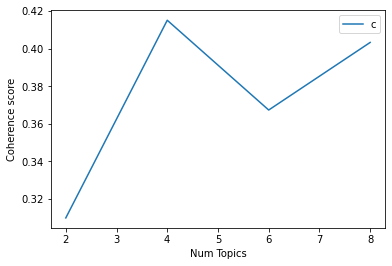

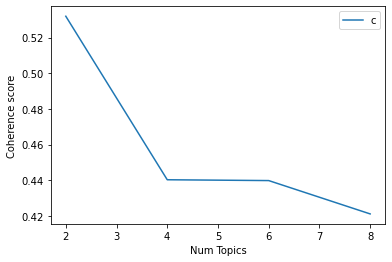

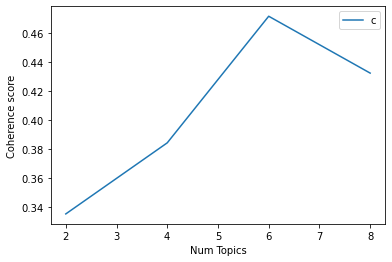

In [44]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values_1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

x = range(start, limit, step)
plt.plot(x, coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

x = range(start, limit, step)
plt.plot(x, coherence_values_3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_1):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4)) #2
    
for m, cv in zip(x, coherence_values_2):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4)) #3

for m, cv in zip(x, coherence_values_3):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4)) #4

Num Topics = 2  has Coherence Value of 0.31
Num Topics = 4  has Coherence Value of 0.415
Num Topics = 6  has Coherence Value of 0.3673
Num Topics = 8  has Coherence Value of 0.4032
Num Topics = 2  has Coherence Value of 0.532
Num Topics = 4  has Coherence Value of 0.4403
Num Topics = 6  has Coherence Value of 0.4398
Num Topics = 8  has Coherence Value of 0.4211
Num Topics = 2  has Coherence Value of 0.3351
Num Topics = 4  has Coherence Value of 0.3842
Num Topics = 6  has Coherence Value of 0.4717
Num Topics = 8  has Coherence Value of 0.4324


In [46]:
# Select the model and print the topics
from pprint import pprint
optimal_model_1 = model_list_1[np.argmax(coherence_values_1)]
model_topics = optimal_model_1.show_topics(num_words=30, formatted=False)
pprint(optimal_model_1.print_topics(num_words=30))

optimal_model_2 = model_list_2[np.argmax(coherence_values_2)]
model_topics = optimal_model_2.show_topics(formatted=False)
pprint(optimal_model_2.print_topics(num_words=30))

optimal_model_3 = model_list_3[np.argmax(coherence_values_3)]
model_topics = optimal_model_3.show_topics(formatted=False)
pprint(optimal_model_3.print_topics(num_words=30))

[(0,
  '0.067*"vessel" + 0.051*"blood" + 0.044*"lumen" + 0.040*"stent" + '
  '0.035*"cathet" + 0.029*"section" + 0.029*"caviti" + 0.022*"radial" + '
  '0.021*"g" + 0.020*"medic_devic" + 0.020*"arteri" + 0.017*"tissu" + '
  '0.016*"tube" + 0.014*"ablat" + 0.014*"adjac" + 0.013*"subject" + '
  '0.013*"longitudin" + 0.012*"diastol" + 0.012*"embol" + 0.012*"condit" + '
  '0.011*"prosthet" + 0.010*"distal" + 0.010*"membran" + 0.010*"cut" + '
  '0.010*"axi" + 0.009*"precursor" + 0.009*"object" + 0.009*"adhes" + '
  '0.008*"insert" + 0.008*"compress"'),
 (1,
  '0.154*"distal" + 0.117*"prosthesi" + 0.115*"fixat" + 0.115*"proxim" + '
  '0.057*"engag" + 0.043*"arm" + 0.039*"sinus" + 0.019*"radial" + '
  '0.018*"ventricular" + 0.018*"aortic_valv" + 0.018*"prosthet" + '
  '0.018*"arteri" + 0.017*"subject" + 0.015*"aortic" + 0.012*"ascend_aorta" + '
  '0.012*"tube" + 0.012*"tissu" + 0.010*"pulmonari_valv" + 0.010*"duct" + '
  '0.009*"pulmonari_trunk" + 0.008*"longitudin" + 0.006*"insert" + '
  '0.0

## save model

In [47]:
from gensim.corpora import MmCorpus
if save_model == 1:
    dictionary.save('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent-v2.dict')
    MmCorpus.serialize('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent_1-v2.mm', bow_corpus_1)
    MmCorpus.serialize('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent_2-v2.mm', bow_corpus_2)
    MmCorpus.serialize('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent_3-v2.mm', bow_corpus_3)
    optimal_model_1.save('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent_1-v2.model')
    optimal_model_2.save('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent_2-v2.model')
    optimal_model_3.save('C:/Users/Annie/Desktop/Topic_analysis/patent/50_patents/TAVI/model_saved/patent_3-v2.model')

## load model

再自己查一下

In [ ]:
from gensim.corpora import MmCorpus
optimal_model_1 = gensim.models.ldamodel.LdaModel.load('TAVI/model_saved/v1/patent_1-v1.model')
bow_corpus_1 = gensim.corpora.MmCorpus('TAVI/model_saved/v1/patent_1-v1.mm')
dictionary = gensim.corpora.Dictionary.load('TAVI/model_saved/v1/patent-v1.dict')


## Visualize the LDA model

In [112]:
#lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=100, workers=8)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#coherencemodel = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
#coherencemodel.get_coherence()

In [49]:
#print(len(dictionary))

In [50]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data_1 = gensimvis.prepare(topic_model=optimal_model_1, corpus=bow_corpus_1, dictionary=optimal_model_1.id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_data_1)

C:\Users\Annie\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\Annie\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [51]:
vis_data_2 = gensimvis.prepare(topic_model=optimal_model_2, corpus=bow_corpus_2, dictionary=optimal_model_2.id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_data_2)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
vis_data_3 = gensimvis.prepare(topic_model=optimal_model_3, corpus=bow_corpus_3, dictionary=optimal_model_3.id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_data_3)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 將data 丟入LDA model

### 計算重疊年分(2011、2016)的專利 在 區間一到區間二 / 區間二到區間三 的主題變化

In [53]:
df_2011 = pd.DataFrame(columns = ['PN','summary','date'])
df_2016 = pd.DataFrame(columns = ['PN','summary','date'])

for i in range(len(documents_merge.YEAR)):
    if documents_merge.iloc[i][2] <= date(2011, 12, 31) and documents_merge.iloc[i][2] >= date(2011,1,1):
        df_2011 = df_2011.append({'PN':documents_merge.iloc[i][0],'summary':documents_merge.iloc[i][1],'date':documents_merge.iloc[i][2]},ignore_index = True)
    if documents_merge.iloc[i][2] <= date(2016, 12, 31) and documents_merge.iloc[i][2] >= date(2016,1,1):
        df_2016 = df_2016.append({'PN':documents_merge.iloc[i][0],'summary':documents_merge.iloc[i][1],'date':documents_merge.iloc[i][2]},ignore_index = True)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df_2011

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,summary,date
0,07867729,"The present invention is based, at least in pa...",2011-01-11
1,07875284,The present disclosure relates to methods of m...,2011-01-25
2,07892281,The object of the present invention is to tran...,2011-02-22
3,07919108,Medical devices comprising a releasable taxane...,2011-04-05
4,07914569,"In view of the foregoing, it is an object of t...",2011-03-29
5,07921848,The present invention provides intrafallopian ...,2011-04-12
6,07947075,It is one aspect of the present invention to p...,2011-05-24
7,07947207,One aspect of the present invention is a metho...,2011-05-24
8,07955382,"In one aspect, the invention features an endop...",2011-06-07
9,07972378,The replacement heart valves of the invention ...,2011-07-05


In [55]:
df_2016

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,summary,date
0,09232997,Embodiments of the present invention include a...,2016-01-12
1,09237948,In some embodiments a delivery system comprise...,2016-01-19
2,09241793,"According to the invention, a valve prosthesis...",2016-01-26
3,09241788,The present invention provides an expandable p...,2016-01-26
4,09241790,The present invention generally relates to med...,2016-01-26
...,...,...,...
204,09498329,The present invention is particularly directed...,2016-11-22
205,09468525,Embodiments hereof relate to a heart valve pro...,2016-10-18
206,09452047,The present invention provides a heart valve p...,2016-09-27
207,09308346,"In some embodiments, a device for crimping a c...",2016-04-12


### 2011年 各主題在區間一及區間二 之專利數

In [270]:
df_output_2011 = pd.DataFrame(columns = ['PN', 'topic_1','topic_2'])
for i in range(len(df_2011)):
    max_score_1 = 0
    bow_vector_1 = dictionary.doc2bow(preprocess(df_2011['summary'][i]))
    topic_score_1 = optimal_model_1.get_document_topics(bow_vector_1)
    PN = df_2011['PN'][i]
    for j in range(len(topic_score_1)):
        if topic_score_1[j][1] > max_score_1:
            max_score_1 = topic_score_1[j][1]
            ######這邊要改!!!!!!!!根據topic ID 跟圖像化那邊的主題一二三四五更改
            if topic_score_1[j][0] == 0:
                topic_1 = '五'
            elif topic_score_1[j][0] == 1:
                topic_1 = '六'
            elif topic_score_1[j][0] == 2:
                topic_1 = '三'
            elif topic_score_1[j][0] == 3:
                topic_1 = '四'
            elif topic_score_1[j][0] == 4:
                topic_1 = '二'
            elif topic_score_1[j][0] == 5:
                topic_1 = '一'  
                
              
    max_score_2 = 0
    bow_vector_2 = dictionary.doc2bow(preprocess(df_2011['summary'][i]))
    topic_score_2 = optimal_model_2.get_document_topics(bow_vector_2)
    for j in range(len(topic_score_2)):
        if topic_score_2[j][1] > max_score_2:
            max_score_2 = topic_score_2[j][1]
            if topic_score_2[j][0] == 0:
                topic_2 = '一'
            elif topic_score_2[j][0] == 1:
                topic_2 = '二'
                
    #print(PN, ' topic:', topic,' score:', max_score )
    df_output_2011 = df_output.append({'PN':PN, 'topic_1':topic_1,'topic_2':topic_2}, ignore_index = True)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
df_output_2011

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,topic_1,topic_2
0,07867729,六,一
1,07875284,三,一
2,07892281,二,一
3,07919108,三,一
4,07914569,二,一
5,07921848,一,一
6,07947075,四,一
7,07947207,三,一
8,07955382,一,一
9,07972378,三,一


In [264]:
c_11 = 0
c_21 = 0
c_31 = 0
c_41 = 0
c_51 = 0
c_61 = 0
c_12 = 0
c_22 = 0
c_32 = 0
c_42 = 0
c_52 = 0
c_62 = 0

for i in range(len(df_output)):
    if df_output['topic_1'][i] == '一':
        if df_output['topic_2'][i] == '一':
            c_11 = c_11 + 1
        elif df_output['topic_2'][i] == '二':
            c_12 = c_12 + 1
    elif df_output['topic_1'][i] == '二': 
        if df_output['topic_2'][i] == '一':
            c_21 = c_21 + 1
        elif df_output['topic_2'][i] == '二':
            c_22 = c_22 + 1
    elif df_output['topic_1'][i] == '三': 
        if df_output['topic_2'][i] == '一':
            c_31 = c_31 + 1
        elif df_output['topic_2'][i] == '二':
            c_32 = c_32 + 1
    elif df_output['topic_1'][i] == '四': 
        if df_output['topic_2'][i] == '一':
            c_41 = c_41 + 1
        elif df_output['topic_2'][i] == '二':
            c_42 = c_42 + 1
    elif df_output['topic_1'][i] == '五': 
        if df_output['topic_2'][i] == '一':
            c_51 = c_51 + 1
        elif df_output['topic_2'][i] == '二':
            c_52 = c_52 + 1
    elif df_output['topic_1'][i] == '六': 
        if df_output['topic_2'][i] == '一':
            c_61 = c_61 + 1
        elif df_output['topic_2'][i] == '二':
            c_62 = c_62 + 1

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2016年 各主題在區間二及區間三 之專利數

In [274]:
df_output_2016 = pd.DataFrame(columns = ['PN', 'topic_2','topic_3'])
for i in range(len(df_2016)):            
    max_score_2 = 0
    bow_vector_2 = dictionary.doc2bow(preprocess(df_2016['summary'][i]))
    topic_score_2 = optimal_model_2.get_document_topics(bow_vector_2)
    for j in range(len(topic_score_2)):
        if topic_score_2[j][1] > max_score_2:
            max_score_2 = topic_score_2[j][1]
            if topic_score_2[j][0] == 0:
                topic_2 = '一'
            elif topic_score_2[j][0] == 1:
                topic_2 = '二'
    
    max_score_3 = 0
    bow_vector_3 = dictionary.doc2bow(preprocess(df_2016['summary'][i]))
    topic_score_3 = optimal_model_3.get_document_topics(bow_vector_3)
    PN = df_2016['PN'][i]
    for j in range(len(topic_score_3)):
        if topic_score_3[j][1] > max_score_3:
            max_score_3 = topic_score_3[j][1]
            ######這邊要改!!!!!!!!根據topic ID 跟圖像化那邊的主題一二三四五更改
            if topic_score_3[j][0] == 0:
                topic_3 = '五'
            elif topic_score_3[j][0] == 1:
                topic_3 = '一'
            elif topic_score_3[j][0] == 2:
                topic_3 = '八'
            elif topic_score_3[j][0] == 3:
                topic_3 = '二'
            elif topic_score_3[j][0] == 4:
                topic_3 = '七'
            elif topic_score_3[j][0] == 5:
                topic_3 = '四'  
            elif topic_score_3[j][0] == 6:
                topic_3 = '六'  
            elif topic_score_3[j][0] == 7:
                topic_3 = '三'  
                           
    #print(PN, ' topic:', topic,' score:', max_score )
    df_output_2016 = df_output_2016.append({'PN':PN, 'topic_2':topic_2,'topic_3':topic_3}, ignore_index = True)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
df_output_2016

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,topic_2,topic_3
0,09232997,一,七
1,09237948,一,二
2,09241793,一,八
3,09241788,一,一
4,09241790,一,三
...,...,...,...
204,09498329,一,八
205,09468525,一,一
206,09452047,二,五
207,09308346,一,七


In [276]:
c_11 = 0
c_12 = 0
c_13 = 0
c_14 = 0
c_15 = 0
c_16 = 0
c_17 = 0
c_18 = 0
c_21 = 0
c_22 = 0
c_23 = 0
c_24 = 0
c_25 = 0
c_26 = 0
c_27 = 0
c_28 = 0
for i in range(len(df_output)):
    if df_output['topic_3'][i] == '一':
        if df_output['topic_2'][i] == '一':
            c_11 = c_11 + 1
        elif df_output['topic_2'][i] == '二':
            c_21 = c_21 + 1
    elif df_output['topic_3'][i] == '二': 
        if df_output['topic_2'][i] == '一':
            c_12 = c_12 + 1
        elif df_output['topic_2'][i] == '二':
            c_22 = c_22 + 1
    elif df_output['topic_3'][i] == '三': 
        if df_output['topic_2'][i] == '一':
            c_13 = c_13 + 1
        elif df_output['topic_2'][i] == '二':
            c_23 = c_23 + 1
    elif df_output['topic_3'][i] == '四': 
        if df_output['topic_2'][i] == '一':
            c_14 = c_14 + 1
        elif df_output['topic_2'][i] == '二':
            c_24 = c_24 + 1
    elif df_output['topic_3'][i] == '五': 
        if df_output['topic_2'][i] == '一':
            c_15 = c_15 + 1
        elif df_output['topic_2'][i] == '二':
            c_25 = c_25 + 1
    elif df_output['topic_3'][i] == '六': 
        if df_output['topic_2'][i] == '一':
            c_16 = c_16 + 1
        elif df_output['topic_2'][i] == '二':
            c_26 = c_26 + 1
    elif df_output['topic_3'][i] == '七': 
        if df_output['topic_2'][i] == '一':
            c_17 = c_17 + 1
        elif df_output['topic_2'][i] == '二':
            c_27 = c_27 + 1
    elif df_output['topic_3'][i] == '八': 
        if df_output['topic_2'][i] == '一':
            c_18 = c_18 + 1
        elif df_output['topic_2'][i] == '二':
            c_28 = c_28 + 1

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [278]:
print(c_11, c_12, c_13, c_14, c_15, c_16, c_17, c_18)
print(c_21, c_22, c_23, c_24, c_25, c_26, c_27, c_28)

29 53 26 22 4 5 39 26
0 1 1 0 3 0 0 0


C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 將三個區間的summary分別代入各區間的LDA model

### 複分

更改df_1 -> df_2 -> df_3 和 optimal_model_1 -> ... -> optimal_model_3 即可分別得到三個區間的複分結果

不紀錄各專利分到各主題的機率是多少

In [63]:
pn_topics = {}
for i in range(len(df_1)):
    bow_vector = dictionary_1.doc2bow(preprocess(df_3['summary'][i]))
    topic_score = optimal_model_1.get_document_topics(bow_vector)
    max_score = 0
    tmp = []
    for j in range(len(topic_score)):
        if topic_score[j][1] > max_score:
            max_score = topic_score[j][1]
    for j in range(len(topic_score)):
        if topic_score[j][1] >= 0.25:   
            ####這個數字要看第一個區間是被分成幾個主題去改，如果分成5個主題就是1/5
            tmp.append(topic_score[j][0])
        elif topic_score[j][1] >= max_score:
            tmp.append(topic_score[j][0])
    pn_topics.update({df_1['PN'][i]:tmp})

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
pn_topics

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'07166570': [1, 3],
 '07175656': [0, 3],
 '07195640': [1, 2],
 '07241295': [1, 2],
 '07261732': [2, 3],
 '07094587': [2],
 '07276078': [0, 2],
 '07100614': [0, 2],
 '07122043': [0, 2],
 '07648527': [0, 2],
 '07648532': [1, 2],
 '07331991': [0],
 '07682390': [1, 2],
 '07351566': [1],
 '07686020': [0, 2],
 '07713298': [2],
 '07712606': [1, 2],
 '07377941': [3],
 '07717952': [1, 2],
 '07381218': [0, 2],
 '07722668': [2, 3],
 '07727555': [1, 2],
 '07736307': [1, 2],
 '07736687': [2],
 '07396364': [0, 3],
 '07753949': [1, 2],
 '07758606': [0, 2],
 '07497873': [0, 1],
 '07780726': [2],
 '07506650': [2],
 '07510577': [2],
 '07513907': [1, 3],
 '07803395': [2],
 '07449236': [0],
 '07449027': [1, 2],
 '07811221': [3],
 '07824443': [1],
 '07828810': [2],
 '07536228': [0, 1, 2],
 '07837727': [0],
 '07470285': [0],
 '07544206': [0, 2],
 '07842377': [1, 3],
 '07846168': [0, 1],
 '07846199': [1, 2],
 '07846203': [1, 2],
 '07846204': [0, 2],
 '07563277': [1, 2],
 '07867729': [2],
 '07875284': [0, 2]

In [65]:
print(len(pn_topics))

124


C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


計算複分情況下各主題有幾件專利以及各專利複分情形(單分有幾件專利?複分到2/3/4/5個主題各有幾件專利?)

In [66]:
#c_1~c_6代表主題一 ~ 主題六，主題是前面視覺化圖形的主題一 ~ 主題六，與topic ID (變數 v[i] = 0~5 )不同
# TN1~TN5用來計算專利號會分成的主題數量，也就是說，如果複分成兩個主題 TN2 會+1，複分成三個主題TN3 +1；TN1則代表單分有幾個專利號
c_1 = 0
c_2 = 0
c_3 = 0
c_4 = 0
c_5 = 0
c_6 = 0
c_7 = 0
c_8 = 0
TN1 = 0
TN2 = 0
TN3 = 0
TN4 = 0
TN5 = 0
TN6 = 0
TN7 = 0
TN8 = 0

for k, v in pn_topics.items():
    if len(v) == 1:
        TN1 = TN1 + 1
    elif len(v) == 2:
        TN2 = TN2 + 1
    elif len(v) == 3:
        TN3 = TN3 + 1 
    elif len(v) == 4:
        TN4 = TN4 + 1 
    elif len(v) == 5:
        TN5 = TN5 + 1 
    elif len(v) == 6:
        TN6 = TN6 + 1 
    elif len(v) == 7:
        TN7 = TN7 + 1 
    elif len(v) == 8:
        TN8 = TN8 + 1 
        
    for i in range(len(v)):
        ######這邊要改!!!!!!!!根據topic ID 跟圖像化那邊的主題一二三四五更改
        if v[i] == 0:
            c_5 = c_5 + 1
        elif v[i] == 1:
            c_1 = c_1 + 1
        elif v[i] == 2:
            c_8 = c_8 + 1
        elif v[i] == 3:
            c_2 = c_2 + 1
        elif v[i] == 4:
            c_7 = c_7 + 1
        elif v[i] == 5:
            c_4 = c_4 + 1
        elif v[i] == 6:
            c_6 = c_6 + 1
        elif v[i] == 7:
            c_3 = c_3 + 1




'''
#計算 period 2
for k, v in pn_topics.items():
    if len(v) == 1:
        TN1 = TN1 + 1
    elif len(v) == 2:
        TN2 = TN2 + 1
    
    for i in range(len(v)):
        if v[i] == 0:
            c_1 = c_1 + 1
        elif v[i] == 1:
            c_2 = c_2 + 1
'''
'''
#計算 period 1
for k, v in pn_topics.items():
    if len(v) == 1:
        TN1 = TN1 + 1
    elif len(v) == 2:
        TN2 = TN2 + 1
    elif len(v) == 3:
        TN3 = TN3 + 1 
    elif len(v) == 4:
        TN4 = TN4 + 1 
    elif len(v) == 5:
        TN5 = TN5 + 1 
        
    for i in range(len(v)):
        if v[i] == 0:
            c_5 = c_5 + 1
        elif v[i] == 1:
            c_6 = c_6 + 1
        elif v[i] == 2:
            c_3 = c_3 + 1
        elif v[i] == 3:
            c_4 = c_4 + 1
        elif v[i] == 4:
            c_2 = c_2 + 1
        elif v[i] == 5:
            c_1 = c_1 + 1
    '''
       
print(TN1, TN2, TN3, TN4, TN5, TN6, TN7, TN8)
print(c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8)
#print(TN1, TN2, c_1, c_2) 
#print(TN1, TN2, TN3, TN4, TN5)

59 61 4 0 0 0 0 0
46 17 0 0 47 0 0 83


C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 單分

會輸出period_1 - period_3 的 excel表格，有紀錄各專利分到各主題的機率是多少

In [67]:
df_output = pd.DataFrame(columns = ['PN', 'topic', 'score'])
for i in range(len(df_1)):
    max_score = 0
    topic = 0
    bow_vector = dictionary_1.doc2bow(preprocess(df_1['summary'][i]))
    topic_score = optimal_model_1.get_document_topics(bow_vector)
    PN = df_1['PN'][i]
    for j in range(len(topic_score)):
        if topic_score[j][1] > max_score:
            max_score = topic_score[j][1]
            topic = topic_score[j][0]
    #print(PN, ' topic:', topic,' score:', max_score )
    df_output = df_output.append({'PN':PN, 'topic':topic, 'score':max_score}, ignore_index = True)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
df_output

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,topic,score
0,07166570,3,0.898982
1,07175656,3,0.572067
2,07195640,3,0.862801
3,07241295,0,0.875499
4,07261732,0,0.618548
...,...,...,...
119,07074189,1,0.442857
120,07195774,3,0.971173
121,07682304,0,0.592491
122,08052749,2,0.770593


In [101]:
#df_output.to_excel('period_1.xlsx')

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
df_output = pd.DataFrame(columns = ['PN', 'topic', 'score'])
for i in range(len(df_2)):
    max_score = 0
    topic = 0
    bow_vector = dictionary_2.doc2bow(preprocess(df_2['summary'][i]))
    topic_score = optimal_model_2.get_document_topics(bow_vector)
    PN = df_2['PN'][i]
    for j in range(len(topic_score)):
        if topic_score[j][1] > max_score:
            max_score = topic_score[j][1]
            topic = topic_score[j][0]
    #print(PN, ' topic:', topic,' score:', max_score )
    df_output = df_output.append({'PN':PN, 'topic':topic, 'score':max_score}, ignore_index = True)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
df_output

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,topic,score
0,07867729,1,0.543005
1,07875284,1,0.997357
2,08348995,0,0.999758
3,08348996,0,0.999758
4,08348998,1,0.984029
...,...,...,...
646,09452047,0,0.775267
647,09308346,1,0.958974
648,09295547,1,0.815855
649,09066800,1,0.569198


In [103]:
#df_output.to_excel('period_2.xlsx')

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
df_output = pd.DataFrame(columns = ['PN', 'topic', 'score'])
for i in range(len(df_3)):
    max_score = 0
    topic = 0
    bow_vector = dictionary_3.doc2bow(preprocess(df_3['summary'][i]))
    topic_score = optimal_model_3.get_document_topics(bow_vector)
    PN = df_3['PN'][i]
    for j in range(len(topic_score)):
        if topic_score[j][1] > max_score:
            max_score = topic_score[j][1]
            topic = topic_score[j][0]
    #print(PN, ' topic:', topic,' score:', max_score )
    df_output = df_output.append({'PN':PN, 'topic':topic, 'score':max_score}, ignore_index = True)

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
df_output

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PN,topic,score
0,09532870,4,0.675756
1,09532873,1,0.906755
2,09539088,5,0.352816
3,09539091,3,0.464078
4,09539094,2,0.709158
...,...,...,...
1734,10610354,1,0.880202
1735,10849745,2,0.694547
1736,10729542,0,0.779623
1737,09801721,1,0.510217


In [105]:
#df_output.to_excel('period_3.xlsx')

C:\Users\Annie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
